# **Market Basket Analysis**

Market basket analysis is the technique used in retail or ecommerce to discover the association betweens projects that are frequently purchased together.

The primary goal is to identify patters and relationships within the transactional data that help understand the customers behaviours, improve marketing strategies  and optimize product placements.



## **Steps Involved in market basket analysis are:**
**Data Collection:**
Gather transactional data containing records of items purchased together.

**Data Preprocessing:**
Clean and format the data to create a transactional dataset.

**Calculate Support, Confidence, and Lift:**
Use these metrics to identify strong associations between items.

**Generate Association Rules:**
Define rules based on the calculated support, confidence, and lift values.

**Interpret Results:**
Analyze the generated rules to gain insights into customer behavior.

**Implementation:**
Implement changes in product placement, marketing strategies, or promotions based on the insights gained.

## Dataset Information:
The columns provide information about the transactions, customers, products, and purchasing behavior, making the dataset suitable for various analyses, including market basket analysis and customer segmentation. Here's a brief explanation of each column in the Dataset:



*   Transaction_ID: A unique identifier for each transaction, represented as a 10-digit number. This column is used to uniquely identify each purchase.
*   Date: The date and time when the transaction occurred. It records the timestamp of each purchase.
*   Customer_Name: The name of the customer who made the purchase. It provides information about the customer's identity.
*   Product: A list of products purchased in the transaction. It includes the names of the products bought.
*   Total_Items: The total number of items purchased in the transaction. It represents the quantity of products bought.
*   Total_Cost: The total cost of the purchase, in currency. It represents the financial value of the transaction.
*   Payment_Method: The method used for payment in the transaction, such as credit card, debit card, cash, or mobile payment.
*   City: The city where the purchase took place. It indicates the location of the transaction.
*   Store_Type: The type of store where the purchase was made, such as a supermarket, convenience store, department store, etc.
*   Discount_Applied: A binary indicator (True/False) representing whether a discount was applied to the transaction.
*   Customer_Category: A category representing the customer's background or age group.
*   Season: The season in which the purchase occurred, such as spring, summer, fall, or winter.
*   Promotion: The type of promotion applied to the transaction, such as "None," "BOGO (Buy One Get One)," or "Discount on Selected Items."



```
# Data set is downloaded from Kaggle
https://www.kaggle.com/datasets/prasad22/retail-transactions-dataset
```




In [1]:
#basic imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt

# Task 1: Data Collection

In [2]:
#load the data from git hub

url = "https://raw.githubusercontent.com/Rk-Pudasaini/Applied_Machine_Learning/main/Datasets/Retail_Transactions_Dataset.csv"
df = pd.read_csv(url)
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2020-12-21 19:42:52,Cheyenne Newman,['Hair Gel'],6,12.77,Debit Card,New York,Convenience Store,True,Student,Winter,None
1,1000000001,2020-07-06 07:45:16,Emily Fitzgerald,"['Tuna', 'Bread', 'Tissues', 'Trash Bags']",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2021-10-02 06:28:44,Michael Webb,"['Jam', 'Soap', 'Ketchup']",7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,None
3,1000000003,2022-01-10 05:39:02,Kimberly Lin,['BBQ Sauce'],9,83.86,Mobile Payment,Seattle,Warehouse Club,True,Senior Citizen,Summer,Discount on Selected Items
4,1000000004,2021-10-13 07:28:47,Cathy Hernandez,"['Hand Sanitizer', 'Bread', 'Extension Cords',...",4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,None


In [3]:
#drop Duplicates
df = df.drop_duplicates()  # Removes duplicate rows from the DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     30000 non-null  int64  
 1   Date               30000 non-null  object 
 2   Customer_Name      30000 non-null  object 
 3   Product            30000 non-null  object 
 4   Total_Items        30000 non-null  int64  
 5   Total_Cost         30000 non-null  float64
 6   Payment_Method     30000 non-null  object 
 7   City               30000 non-null  object 
 8   Store_Type         30000 non-null  object 
 9   Discount_Applied   30000 non-null  bool   
 10  Customer_Category  30000 non-null  object 
 11  Season             30000 non-null  object 
 12  Promotion          30000 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 3.0+ MB


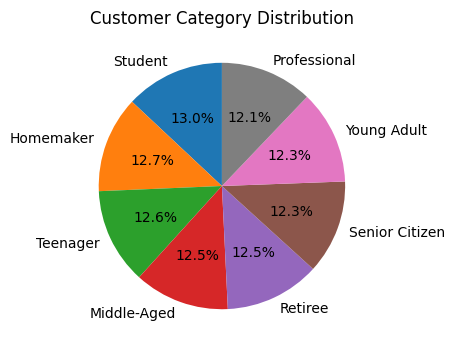

In [5]:
# Draw the pie chart of customer category
customer_categories = df['Customer_Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(customer_categories, labels=customer_categories.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Category Distribution')
plt.show()


In [6]:
# Take only the first 100 rows
df = df.head(1000)

# Task 2: Data Preprocessing

In [7]:
# Dropping unwanted columns
unwanted_columns = ['Transaction_ID','Date','Customer_Name','Total_Cost','Payment_Method','City','Store_Type','Discount_Applied','Customer_Category','Season','Promotion']
df = df.drop(columns = unwanted_columns)
df.head()

,Product,Total_Items
0,['Hair Gel'],6
1,"['Tuna', 'Bread', 'Tissues', 'Trash Bags']",5
2,"['Jam', 'Soap', 'Ketchup']",7
3,['BBQ Sauce'],9
4,"['Hand Sanitizer', 'Bread', 'Extension Cords',...",4


In [8]:
df.shape

(1000, 2)

In [9]:
def extract_products(data):
    all_products = []

    # Iterate over each element in the data
    for row in data:
        if row is not None:
            # Remove square brackets and double quotes, then split by comma
            row = row.replace('[', '').replace(']', '').replace('"', '').replace("'", "")
            row_products = [product.strip() for product in row.split(',')]
        else:
            row_products = []

        # Add the row's product list to the overall list of all products
        all_products.append(row_products) #get the list of list
        #all_products.extend(row_products)  #for getting the single list of all transaction products

    return all_products

#extract product and print products list of list
all_products = extract_products(df['Product'])
print(all_products)

print("=====LIST OF LIST PRODUCTS=====")
for row_products in all_products[:10]:  #display only 10 transaction list
    print(row_products)


[['Hair Gel'], ['Tuna', 'Bread', 'Tissues', 'Trash Bags'], ['Jam', 'Soap', 'Ketchup'], ['BBQ Sauce'], ['Hand Sanitizer', 'Bread', 'Extension Cords', 'Ice Cream', 'Hand Sanitizer'], ['Shower Gel', 'Baby Wipes', 'Banana', 'Paper Towels'], ['Cereal', 'Tuna'], ['Iron', 'Extension Cords', 'Eggs', 'Iron', 'Tuna'], ['Banana', 'Pickles'], ['Ketchup', 'Razors', 'Lawn Mower'], ['Shrimp', 'Soda'], ['Soap', 'Vacuum Cleaner', 'Shower Gel', 'Mayonnaise'], ['BBQ Sauce', 'Soda', 'Lawn Mower'], ['Ironing Board', 'Laundry Detergent', 'Deodorant', 'Cereal'], ['Lawn Mower', 'Tea'], ['Syrup'], ['Tea', 'Spinach', 'Mustard', 'Cleaning Rags', 'Peanut Butter'], ['Tuna', 'Bath Towels', 'Potatoes'], ['Syrup', 'Yogurt', 'Eggs'], ['Eggs'], ['Eggs', 'Razors', 'Peanut Butter', 'Toothpaste', 'Cheese'], ['Shrimp', 'Milk', 'Dish Soap'], ['Cereal', 'Water', 'Bread', 'Laundry Detergent'], ['Insect Repellent', 'Soda', 'Laundry Detergent'], ['Dishware', 'Plant Fertilizer', 'Hair Gel', 'Apple', 'Toothpaste'], ['Extension Co

In [10]:
#function to count the total unique products used in the transaction or all products list
def count_product_frequency(all_products):
    product_counts = {}
    for products in all_products:
        for product in products:
            if product in product_counts:
                product_counts[product] += 1
            else:
                product_counts[product] = 1
    return product_counts

# COUNT THE PRIDUCTS IN THE LIST
product_counts = count_product_frequency(all_products)
print('Total Unique Products:',len(product_counts))

# Print the frequency of each product
print("Product Frequencies:")
for product, count in product_counts.items():
    print(f"{product}: {count}")


Total Unique Products: 81
Product Frequencies:
Hair Gel: 41
Tuna: 37
Bread: 35
Tissues: 38
Trash Bags: 43
Jam: 48
Soap: 37
Ketchup: 36
BBQ Sauce: 25
Hand Sanitizer: 41
Extension Cords: 47
Ice Cream: 35
Shower Gel: 40
Baby Wipes: 31
Banana: 38
Paper Towels: 31
Cereal: 40
Iron: 45
Eggs: 42
Pickles: 40
Razors: 36
Lawn Mower: 33
Shrimp: 50
Soda: 48
Vacuum Cleaner: 37
Mayonnaise: 38
Ironing Board: 48
Laundry Detergent: 27
Deodorant: 39
Tea: 44
Syrup: 35
Spinach: 35
Mustard: 43
Cleaning Rags: 37
Peanut Butter: 31
Bath Towels: 50
Potatoes: 37
Yogurt: 32
Toothpaste: 73
Cheese: 36
Milk: 37
Dish Soap: 31
Water: 40
Insect Repellent: 37
Dishware: 37
Plant Fertilizer: 48
Apple: 34
Orange: 39
Pasta: 36
Chips: 27
Sponges: 42
Salmon: 31
Dustpan: 25
Feminine Hygiene Products: 27
Light Bulbs: 33
Pancake Mix: 25
Toilet Paper: 31
Olive Oil: 35
Vinegar: 30
Onions: 46
Cereal Bars: 37
Rice: 48
Beef: 42
Broom: 35
Power Strips: 32
Toothbrush: 43
Garden Hose: 33
Canned Soup: 33
Butter: 30
Diapers: 49
Carrots: 4

# Task 3: Run Algorithm

In [11]:
# Define global variables
frequent_itemsets = []
supports = []
discarded = []
min_support = 2  # Set your minimum support threshold here
min_conf = 0.55

In [12]:
from itertools import combinations

# Define helper functions
def get_items(transactions):
    items = set()
    for transaction in transactions:
        items.update(transaction)
    return list(items)

def calculate_support(itemset, transactions):
    count = 0
    for transaction in transactions:
        if set(itemset).issubset(transaction):
            count += 1
    return count

def print_frequent_itemsets(n, itemsets, supports):
    print(f"Frequent Itemsets for n={n}:")
    for i in range(len(itemsets)):
        print(f"Itemset: {itemsets[i]} ---- Support: {supports[i]}")

def print_supersets(itemset, n):
    subsets = [set()]
    for i in range(1, len(itemset) + 1):
        if n == 1:
            superset_list = [set([x]) for x in itemset]
        elif n == 2 and i == 2:
            superset_list = [set(pair) for pair in combinations(itemset, 2)]
        elif n > 2:
            if i == 1 or i == n - 1:  # Filter single item subsets and subsets of size n-1
                superset_list = []
            else:
                superset_list = [set(comb) for comb in combinations(itemset, i)]
        else:
            superset_list = []

        subsets.extend(superset_list)

    subsets = [subset for subset in subsets if subset]  # Exclude empty sets
    return subsets

def get_itemsetset(items, n):
    frequent_sets = []
    for itemset in combinations(items, n):
        support_count = calculate_support(itemset, transactions)
        if support_count >= min_support:
            frequent_sets.append(itemset)
            supports[n - 1].append(support_count)
        else:
            discarded.append(itemset)
    return frequent_sets

def generate_frequent_itemset():
    items = get_items(transactions)
    for n in range(1, len(items) + 1):  # Generate frequent itemsets for n=1 to len(items)
        print(f" ======== n = {n} =========")
        frequent_itemsets.append([])  # Initialize the list for frequent itemsets of size n
        supports.append([])  # Initialize the list for supports of frequent itemsets of size n

        # Generate frequent itemsets of size n
        itemsets = get_itemsetset(items, n)
        frequent_itemsets[n - 1] = itemsets  # Update the list of frequent itemsets
        print_frequent_itemsets(n, itemsets, supports[n - 1])

        # Generate and print supersets of frequent itemsets of size n
        all_supersets = []
        for itemset in itemsets:
            subsets = print_supersets(itemset, n)
            all_supersets.extend(subsets)

        print(f"Supersets for n={n}: {all_supersets}")

        # Check if the necessary condition is met and break the loop if it is
        if len(itemsets) <= 1:
            break

    return frequent_itemsets

In [13]:
# Sample transactions data (replace with your actual transactions)
transactions = all_products[:100]
# import random
# # Sample 100 transactions randomly
# transactions = random.sample(all_products, 200)

# Generate frequent itemsets
frequent_itemsets = generate_frequent_itemset()

 ======== n = 1 =========
Frequent Itemsets for n=1:
Itemset: ('Bread',) ---- Support: 6
Itemset: ('Shaving Cream',) ---- Support: 4
Itemset: ('Vinegar',) ---- Support: 4
Itemset: ('Tissues',) ---- Support: 3
Itemset: ('Butter',) ---- Support: 2
Itemset: ('Broom',) ---- Support: 5
Itemset: ('Extension Cords',) ---- Support: 4
Itemset: ('Toilet Paper',) ---- Support: 4
Itemset: ('Insect Repellent',) ---- Support: 3
Itemset: ('Tuna',) ---- Support: 6
Itemset: ('Diapers',) ---- Support: 3
Itemset: ('Razors',) ---- Support: 5
Itemset: ('Onions',) ---- Support: 7
Itemset: ('Carrots',) ---- Support: 2
Itemset: ('Laundry Detergent',) ---- Support: 5
Itemset: ('Dish Soap',) ---- Support: 3
Itemset: ('Cheese',) ---- Support: 4
Itemset: ('Light Bulbs',) ---- Support: 2
Itemset: ('Vacuum Cleaner',) ---- Support: 4
Itemset: ('Beef',) ---- Support: 3
Itemset: ('Soda',) ---- Support: 8
Itemset: ('Pancake Mix',) ---- Support: 3
Itemset: ('Apple',) ---- Support: 6
Itemset: ('Paper Towels',) ---- Suppo

In [14]:
def get_subsets(itemset):
    subsets = []
    for i in range(1, len(itemset)):
        subsets.extend(combinations(itemset, i))
    return subsets

def generate_association_rules(frequent_itemsets, min_confidence, transactions):
    association_rules = []
    max_itemset_number = len(frequent_itemsets) - 1

    for I in frequent_itemsets[max_itemset_number]:
        subsets = get_subsets(I)
        for S in subsets:
            S = frozenset(S)  # Convert the tuple to a frozenset
            I_S = frozenset(I) - S  # Convert the tuple to a frozenset before subtracting
            if len(I_S) <= 0:
                continue
            I_support = calculate_support(I, transactions)
            S_support = calculate_support(S, transactions)

            confidence = I_support / S_support
            if confidence >= min_confidence:
                association_rules.append((S, I_S, confidence))
                is_selected = 'SELECTED'
            else:
                is_selected = 'REJECTED'

            print(f"{S} => {I_S} | Confidence: {confidence:.2f} | {is_selected}")

    return association_rules

# Generate association rules
association_rules = generate_association_rules(frequent_itemsets, min_conf, transactions)

print("Number of association rules generated:", len(association_rules))  # Debugging statement

# Print the association rules
print("Association Rules:")
for antecedent, consequent, confidence in association_rules:
    print(f"Antecedent: {antecedent} => Consequent: {consequent} | Confidence: {confidence:.2f}")


frozenset({'Shower Gel'}) => frozenset({'Shrimp', 'Dishware'}) | Confidence: 0.20 | REJECTED
frozenset({'Shrimp'}) => frozenset({'Shower Gel', 'Dishware'}) | Confidence: 0.33 | REJECTED
frozenset({'Dishware'}) => frozenset({'Shower Gel', 'Shrimp'}) | Confidence: 0.40 | REJECTED
frozenset({'Shower Gel', 'Shrimp'}) => frozenset({'Dishware'}) | Confidence: 1.00 | SELECTED
frozenset({'Shower Gel', 'Dishware'}) => frozenset({'Shrimp'}) | Confidence: 1.00 | SELECTED
frozenset({'Dishware', 'Shrimp'}) => frozenset({'Shower Gel'}) | Confidence: 1.00 | SELECTED
Number of association rules generated: 3
Association Rules:
Antecedent: frozenset({'Shower Gel', 'Shrimp'}) => Consequent: frozenset({'Dishware'}) | Confidence: 1.00
Antecedent: frozenset({'Shower Gel', 'Dishware'}) => Consequent: frozenset({'Shrimp'}) | Confidence: 1.00
Antecedent: frozenset({'Dishware', 'Shrimp'}) => Consequent: frozenset({'Shower Gel'}) | Confidence: 1.00


# Task 4: Interprate
In this market basket Analysis we load the data set with transaction data, generates frequent itemsets, and then uses them to generate association rules based on a minimum confidence threshold.

Initially, the transaction data is loaded and preprocessed to extract individual products from each transaction. This ensures that the data is in a suitable format for analysis.

Subsequently, frequent itemsets are generated by identifying sets of items that frequently occur together in the transactions.

Finally, the association rules are generated which provides insights into the relationships between different items in the dataset. These rules can be leveraged for various purposes such as product recommendation, market basket analysis, and understanding customer behavior. Nonetheless, the quality of the association rules is influenced by factors like the chosen minimum support and confidence thresholds, as well as the size and nature of the dataset.